In [5]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from PIL import Image
import matplotlib.pyplot as plt
path = '/mnt/c/Users/tomsq/Documents/wsl/diabetesProject/diabeteslearningDeeplearning/manualSemanticSegmentation/groundTruthGeneration/build/tomas/gt'
fnames = get_image_files(path)

print(len(fnames))



243


In [12]:

totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(fnames[i])
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))




In [13]:
print("Ground truth Codes",totalArray)

Ground truth Codes [0, 1, 28, 65, 74, 83, 0, 3, 4, 53, 0, 1, 3, 4, 61, 65, 72, 0, 3, 60, 91, 0, 3, 53, 66, 74, 77, 91, 0, 3, 9, 60, 0, 3, 4, 17, 53, 66, 91, 0, 12, 53, 74, 0, 3, 53, 61, 67, 91, 0, 3, 12, 66, 68, 73, 74, 77, 0, 96, 0, 3, 9, 58, 66, 0, 3, 4, 60, 0, 3, 4, 53, 67, 72, 89, 0, 1, 3, 17, 53, 91, 0, 2, 60, 65, 68, 72, 73, 82, 0, 3, 60, 61, 91, 98, 0, 1, 3, 4, 53, 65, 72, 74, 81, 0, 1, 3, 27, 65, 73, 0, 1, 3, 4, 60, 67, 0, 3, 4, 60, 65, 72, 0, 3, 4, 66, 89, 99, 0, 9, 53, 72, 74, 89, 0, 3, 4, 12, 53, 0, 3, 60, 89, 0, 3, 53, 66, 72, 74, 89, 0, 6, 60, 65, 72, 0, 3, 4, 12, 59, 89, 0, 3, 4, 60, 65, 73, 93, 0, 4, 17, 53, 61, 67, 0, 3, 53, 89, 0, 20, 35, 71, 0, 9, 60, 73, 0, 9, 60, 89, 0, 8, 12, 17, 28, 53, 0, 4, 12, 53, 65, 74, 0, 60, 69, 71, 88, 89, 91, 93, 0, 1, 3, 60, 91, 0, 9, 53, 73, 0, 3, 60, 68, 73, 74, 82, 0, 3, 10, 55, 65, 72, 0, 12, 53, 74, 0, 1, 9, 53, 74, 0, 96, 0, 3, 17, 53, 67, 91, 0, 12, 53, 61, 70, 72, 77, 0, 1, 3, 4, 61, 65, 77, 93, 0, 3, 60, 65, 72, 88, 0, 96, 0, 3,

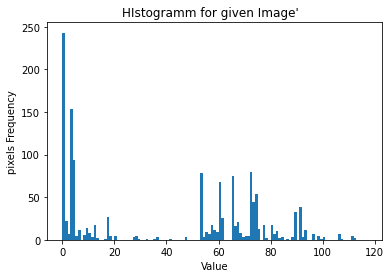

In [14]:
plt.show()
plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
hist = plt.hist(totalArray, bins=117, range=(0,117))

In [19]:
codes = np.loadtxt( './' + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[1] for code in codes] #pega apenas o nome de cada classe e ignora o ID
dicionario = {}

for code, contagem in zip(codes, hist[0]):
    dicionario[code] = contagem

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort

print(dicionario)

{'NaoAlimento': 243.0, 'Arroz Branco': 153.0, 'Feijão': 94.0, 'Tomate': 80.0, 'Carne de Vaca': 78.0, 'Alface': 75.0, 'Frango (sem osso)': 68.0, 'Cenoura': 54.0, 'Brócolis': 44.0, 'Batata Frita': 38.0, 'Mix Vegetais': 33.0, 'Farofa': 27.0, 'Ovo': 26.0, 'AlimentoNaoRegistrado': 22.0, 'Alface com Legumes': 21.0, 'Pure de Batata': 17.0, 'Carne moída': 17.0, 'Beterraba': 17.0, 'Couve': 17.0, 'Alface com Tomate': 16.0, 'Batata': 14.0, 'Abobrinha': 13.0, 'Arroz Branco e Feijao': 12.0, 'Pepino': 12.0, 'Peixe': 11.0, 'Couve Flor': 10.0, 'Strogonoff': 9.0, 'Frango (com osso)': 9.0, 'Batata Palha': 8.0, 'Vagem': 8.0, 'Arroz Integral': 7.0, 'Linguiça': 7.0, 'Repolho Branco': 7.0, 'Macarrão com molho': 7.0, 'Limão': 7.0, 'Macarrão': 6.0, 'Feijão Tropeiro': 5.0, 'Maionese': 5.0, 'Arroz Integral e Feijao': 4.0, 'Lentilha': 4.0, 'Cebola Crua': 4.0, 'Tomate Cereja': 4.0, 'Banana Milanesa': 4.0, 'Vinagrete': 4.0, 'Batata Doce': 3.0, 'Milho': 3.0, 'Maçã': 3.0, 'Laranja sem Casca': 3.0, 'Cozido de Carne':

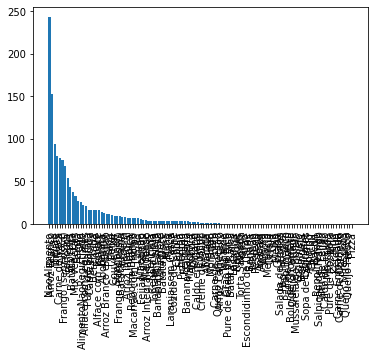

In [27]:
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.savefig('saved_figure.png')
#plt.show()